In [12]:
from diffusers import DiffusionPipeline
import torch
pipeline = DiffusionPipeline.from_pretrained("Lykon/dreamshaper-7")
pipeline.load_lora_weights("openskyml/midjourney-v4-xl")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [13]:
import torch
prompt = "RTX, UNREAL ENGINE, Global illumination, Deep glow, Particles Highly detailed painting image quality of The kiss passion beautiful woman with long hair and blue dress and knite unreal engine, fantasy art by greg rutkowski, loish, rhads, ferdinand knab, makoto shinkai and lois van baarle, ilya kuvshinov, rossdraws, tom bagshaw, global illumination, radiant light, detailed and intricate environment "
def get_inputs(batch_size=1):
    prompts = batch_size * [prompt]
    num_inference_steps = 50

    return {"prompt": prompts, "num_inference_steps": num_inference_steps}

In [14]:
def dummy(images, **kwargs):
    return images, [False]
pipeline.safety_checker = dummy

Token indices sequence length is longer than the specified maximum sequence length for this model (89 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['shaw, global illumination, radiant light, detailed and intricate environment']


  0%|          | 0/50 [00:00<?, ?it/s]

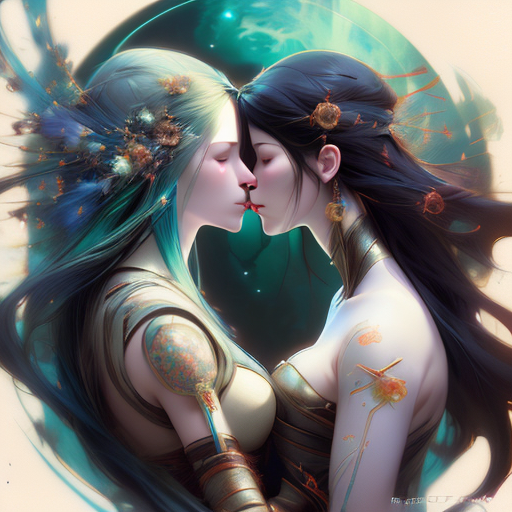

In [15]:
from diffusers.utils import make_image_grid
pipeline.to('mps')
pipeline.enable_attention_slicing()
images = pipeline(**get_inputs(batch_size=1), max_embeddings_multiples=3).images
images[0]